In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [5]:
orders = pd.read_excel('Case Study Dataset.xls', sheet_name='Orders')
salesperson_dimension = pd.read_excel('Case Study Dataset.xls', sheet_name='Salesperson Dimension')
product_dimension = pd.read_excel('Case Study Dataset.xls', sheet_name='Product Dimension')
customer_dimension = pd.read_excel('Case Study Dataset.xls', sheet_name='Customer Dimension')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     3432 non-null   int64         
 1   Customer ID        3432 non-null   object        
 2   Customer Name      3432 non-null   object        
 3   Order Date         3432 non-null   datetime64[ns]
 4   Sales Person Name  3432 non-null   object        
 5   Product ID         3432 non-null   object        
 6   Category           3432 non-null   object        
 7   Product Name       3432 non-null   object        
 8   Dollar Sales       3432 non-null   int64         
 9   Returns            3432 non-null   int64         
 10  Quantity           3432 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 295.1+ KB


In [7]:
salesperson_dimension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sales Person Name  6 non-null      object
 1   Sales Person ID    6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


# Data Quality Issue

In [8]:
salesperson_dimension[salesperson_dimension['Sales Person ID'].duplicated()]
# The Sales Person ID is being repeated for another Sales Person

,Sales Person Name,Sales Person ID
2,Samuel Washington,1451


In [9]:
orders.groupby('Transaction ID').agg('count').iloc[:,:1]
# more than one customer IDs are present corresponding to one trasaction ID.

,Customer ID
Transaction ID,
100013,1
100041,2
100048,3
100055,2
100083,1
...,...
169901,1
169922,1
169943,3


In [10]:
orders.head()

,Transaction ID,Customer ID,Customer Name,Order Date,Sales Person Name,Product ID,Category,Product Name,Dollar Sales,Returns,Quantity
0,103982,AA-10375,Allen Armold,2021-11-14,John Blake,J-2001,Jeans,Black Denim,25,0,1
1,147039,AA-10375,Allen Armold,2022-09-07,Alex Ferguson,J-2003,Jeans,Chinos,200,0,5
2,131065,AA-10375,Allen Armold,2022-09-07,Alex Ferguson,J-2002,Jeans,Blue Denim,30,0,2
3,131065,AA-10375,Allen Armold,2022-12-11,Alex Ferguson,J-2003,Jeans,Chinos,120,0,3
4,169488,AA-10480,Andrew Allen,2021-07-17,Samuel Washington,J-2003,Jeans,Chinos,120,0,3


In [11]:
orders['Dollar Sales'] - (orders['Returns']*(orders['Dollar Sales']/orders['Quantity']))
# Net Sales = Dollar_sales - Return*(Price of each qty)
# Net Sales is negative for some data, which can be considered as an issue.

0         25.0
1        200.0
2         30.0
3        120.0
4        120.0
         ...  
3427    -810.0
3428   -1350.0
3429      50.0
3430     140.0
3431   -1800.0
Length: 3432, dtype: float64

In [12]:
product_dimension[product_dimension['Product ID'].duplicated()]

,Product Name,Category,Product ID,Per Unit Price ($)


In [13]:
customer_dimension[customer_dimension['Customer ID'].duplicated()]

,Customer Name,Customer ID


# Data Manipulation

## Q.1 

In [14]:
mask = (orders['Order Date'] > '2020-08-05') & (orders['Order Date'] <= '2022-01-01')
orders_for_discount_calc = orders[mask]

In [15]:
orders_for_discount_calc


,Transaction ID,Customer ID,Customer Name,Order Date,Sales Person Name,Product ID,Category,Product Name,Dollar Sales,Returns,Quantity
0,103982,AA-10375,Allen Armold,2021-11-14,John Blake,J-2001,Jeans,Black Denim,25,0,1
4,169488,AA-10480,Andrew Allen,2021-07-17,Samuel Washington,J-2003,Jeans,Chinos,120,0,3
5,169488,AA-10480,Andrew Allen,2021-07-17,Samuel Washington,J-2003,Jeans,Chinos,40,0,1
6,100230,AA-10480,Andrew Allen,2021-07-17,Samuel Washington,J-2002,Jeans,Blue Denim,120,0,8
7,100230,AA-10480,Andrew Allen,2021-08-26,Samuel Washington,J-2002,Jeans,Blue Denim,30,0,2
...,...,...,...,...,...,...,...,...,...,...,...
3424,102288,XP-21865,Xylona Preis,2021-08-26,John Blake,SO-3001,Shoes,Sneakers,150,0,3
3427,167682,ZC-21910,Zuschuss Carroll,2021-03-08,John Blake,SO-3003,Shoes,Formal Shoes,270,12,3
3428,147991,ZC-21910,Zuschuss Carroll,2021-04-08,Jane Austin,SO-3003,Shoes,Formal Shoes,360,19,4
3430,152471,ZD-21925,Zuschuss Donatelli,2021-04-03,Jane Austin,SO-3002,Shoes,Running Shoes,280,2,4


In [16]:
orders_transactions = orders_for_discount_calc.groupby(['Customer ID','Transaction ID'])

In [17]:
orders_transactions = orders_transactions.agg('sum')

In [18]:
orders_transactions

Dollar Sales  Returns  Quantity
Customer ID Transaction ID                                 
AA-10375    103982                    25        0         1
            137547                    46        0         2
AA-10480    100230                   150        0        10
            107797                    45        0         3
            147277                    69        0         3
...                                  ...      ...       ...
ZD-21925    100055                    72        0         4
            102813                    30        0         2
            141481                   250       41         5
            152471                   280        2         4
            152555                   115        0         5

[1304 rows x 3 columns]

In [19]:
orders_transactions = orders_transactions.reset_index().groupby('Customer ID')
orders_transactions = orders_transactions.agg({'Transaction ID':'count','Dollar Sales':'sum'})
orders_transactions.rename(columns = {'Transaction ID':'No of Transactions','Dollar Sales':'Total Dollar Sales'}, inplace = True)
orders_transactions = orders_transactions.reset_index()
orders_transactions

,Customer ID,No of Transactions,Total Dollar Sales
0,AA-10375,2,71
1,AA-10480,5,624
2,AA-10645,2,1010
3,AB-10015,2,136
4,AB-10060,4,275
...,...,...,...
546,WB-21850,6,1355
547,XP-21865,5,539
548,YC-21895,3,265
549,ZC-21910,7,1198


In [20]:
def discount_group(trans=0, sales=0):
    if trans>8 or sales>5000:
        return 30
    elif (trans>4 and trans<9) or (sales>2000 and trans<=5000):
        return 20
    else:
        return 10

In [21]:
orders_transactions['Discount (%)'] = orders_transactions.apply(lambda x: discount_group(x['No of Transactions'], x['Total Dollar Sales']), axis=1)

## Ans 1

In [22]:
orders_transactions

,Customer ID,No of Transactions,Total Dollar Sales,Discount (%)
0,AA-10375,2,71,10
1,AA-10480,5,624,20
2,AA-10645,2,1010,10
3,AB-10015,2,136,10
4,AB-10060,4,275,10
...,...,...,...,...
546,WB-21850,6,1355,20
547,XP-21865,5,539,20
548,YC-21895,3,265,10
549,ZC-21910,7,1198,20


In [23]:
orders_transactions['Discount (%)'].value_counts()

10    494
20     54
30      3
Name: Discount (%), dtype: int64

## Ans 2

In [24]:
orders_transactions

,Customer ID,No of Transactions,Total Dollar Sales,Discount (%)
0,AA-10375,2,71,10
1,AA-10480,5,624,20
2,AA-10645,2,1010,10
3,AB-10015,2,136,10
4,AB-10060,4,275,10
...,...,...,...,...
546,WB-21850,6,1355,20
547,XP-21865,5,539,20
548,YC-21895,3,265,10
549,ZC-21910,7,1198,20


## Q.3

In [25]:
mask = (orders['Order Date'] > '2022-02-05') & (orders['Order Date'] <= '2022-08-05')
orders_last_six_months = orders[mask]

In [26]:
orders_last_six_months

,Transaction ID,Customer ID,Customer Name,Order Date,Sales Person Name,Product ID,Category,Product Name,Dollar Sales,Returns,Quantity
8,121671,AA-10480,Andrew Allen,2022-04-15,John Blake,J-2003,Jeans,Chinos,120,0,3
19,157196,AB-10165,Alan Barnes,2022-04-14,Alex Ferguson,J-2003,Jeans,Chinos,120,0,3
21,140935,AB-10255,Alejandro Ballentine,2022-06-16,Mike Davidson,J-2003,Jeans,Chinos,120,0,3
22,108637,AB-10255,Alejandro Ballentine,2022-06-16,Mike Davidson,J-2001,Jeans,Black Denim,100,0,4
27,159688,AD-10180,Alan Dominguez,2022-04-30,Mike Davidson,J-2003,Jeans,Chinos,160,0,4
...,...,...,...,...,...,...,...,...,...,...,...
3412,123932,TW-21025,Tamara Willingham,2022-06-13,Mike Davidson,SO-3002,Shoes,Running Shoes,280,49,4
3414,119809,VF-21715,Vicky Freymann,2022-07-08,Mike Davidson,SO-3003,Shoes,Formal Shoes,270,10,3
3415,169103,VG-21790,Vivek Gonzalez,2022-07-29,Mike Davidson,SO-3001,Shoes,Sneakers,100,0,2
3418,156986,VS-21820,Vivek Sundaresam,2022-05-23,Mike Davidson,SO-3001,Shoes,Sneakers,150,0,3


In [27]:
orders_last_six_months = orders_last_six_months.groupby(['Customer ID','Transaction ID'])
orders_last_six_months = orders_last_six_months.agg('sum')
orders_last_six_months = orders_last_six_months.reset_index().groupby('Customer ID')
orders_last_six_months = orders_last_six_months.agg({'Transaction ID':'count','Dollar Sales':'sum'})
orders_last_six_months = orders_last_six_months.reset_index()
orders_last_six_months.rename(columns = {'Transaction ID':'No of Transactions','Dollar Sales':'Total Dollar Sales'}, inplace = True)


## Ans 3

In [28]:
orders_last_six_months.sort_values('Total Dollar Sales', ascending=False).head(10).reset_index().drop('No of Transactions',axis =1)

,index,Customer ID,Total Dollar Sales
0,58,CJ-12010,1568
1,25,BC-11125,1185
2,96,DR-12880,1180
3,153,JC-15775,1139
4,60,CK-12325,1098
5,18,AM-10705,1084
6,296,SC-20380,1072
7,282,RL-19615,1060
8,233,ML-17410,1045
9,30,BE-11335,1025


## Q.4

In [29]:
orders['Sales Person Name'].value_counts()

Mike Davidson        1075
Alex Ferguson         605
John Blake            545
Jane Austin           527
Saul Goodman          363
Samuel Washington     317
Name: Sales Person Name, dtype: int64

In [30]:
salesperson_mask = (orders['Order Date'] > '2022-05-05') & (orders['Order Date'] <= '2022-08-05')
orders_last_three_months = orders[mask]

orders_last_three_months = orders_last_three_months.groupby(['Sales Person Name'])
orders_last_three_months = orders_last_three_months.agg('sum')

In [31]:
def bonus(dollar_sales):
    if dollar_sales>5000:
        return 0.1*dollar_sales
    else:
        return 0

In [32]:
orders_last_three_months.sort_values('Dollar Sales', ascending=False, inplace= True)
orders_last_three_months = orders_last_three_months.iloc[0:2]

In [33]:
orders_last_three_months['Bonus ($)'] = orders_last_three_months.apply(lambda x: bonus(x['Dollar Sales']), axis=1)

In [34]:
orders_last_three_months = orders_last_three_months.drop(['Transaction ID','Quantity','Returns'],axis =1)

## Ans 4

In [35]:
orders_last_three_months

,Dollar Sales,Bonus ($)
Sales Person Name,,
Mike Davidson,32200,3220.0
John Blake,19145,1914.5


## Q.5

In [36]:
orders['Product Name'].value_counts()

Sneakers             416
Formal Shoes         416
Running Shoes        416
Black Denim          368
Blue Denim           368
Chinos               367
T Shirt              361
Full Sleeve Shirt    360
Half Sleeve Shirt    360
Name: Product Name, dtype: int64

In [37]:
mask = (orders['Order Date'] > '2022-01-01') & (orders['Order Date'] <= '2022-08-05')
top_products = orders[mask]
top_products = top_products.drop(['Transaction ID','Quantity','Returns'],axis =1).groupby(['Category','Product Name'])

In [38]:
top_products = top_products.agg('sum')

In [39]:
top_products.reset_index(inplace = True)
top_products.sort_values('Dollar Sales', ascending = False, inplace = True)
top_products.reset_index(inplace = True, drop = True)

In [40]:
top_products

,Category,Product Name,Dollar Sales
0,Shoes,Formal Shoes,35550
1,Shoes,Running Shoes,21910
2,Shoes,Sneakers,13550
3,Jeans,Chinos,13520
4,Shirts,Full Sleeve Shirt,8786
5,Jeans,Black Denim,8150
6,Shirts,Half Sleeve Shirt,6300
7,Shirts,T Shirt,4650
8,Jeans,Blue Denim,4455


In [41]:
top_products = top_products.groupby(['Category'])

## Ans 5
Displaying Top products in each category according to Dollar Sales over 2022

In [42]:
top_products.first()

,Product Name,Dollar Sales
Category,,
Jeans,Chinos,13520
Shirts,Full Sleeve Shirt,8786
Shoes,Formal Shoes,35550


# Data Visualisation

## Q.1

In [43]:
vis_orders = orders

In [44]:
vis_orders['Order Date'] = vis_orders['Order Date'].astype(str).str[:7]

In [45]:
vis_orders = vis_orders.groupby('Order Date').agg('sum').reset_index().drop(['Transaction ID','Returns','Quantity'], axis = 1)

In [46]:
vis_orders['temp'] = [0]+vis_orders['Dollar Sales'].tolist()[:-1]

In [47]:
vis_orders

,Order Date,Dollar Sales,temp
0,2021-01,9872,0
1,2021-02,6142,9872
2,2021-03,15847,6142
3,2021-04,13790,15847
4,2021-05,20752,13790
5,2021-06,15833,20752
6,2021-07,18120,15833
7,2021-08,14328,18120
8,2021-09,29730,14328
9,2021-10,18858,29730


In [48]:
def growth(present, last_month):
    return (present-last_month)*100/last_month
    

In [49]:
vis_orders['Growth (%)'] = [0]+vis_orders.iloc[1:].apply(lambda x: growth(x['Dollar Sales'], x['temp']), axis=1).tolist()

In [50]:
vis_orders = vis_orders.drop('temp',axis = 1)

In [51]:
vis_orders

,Order Date,Dollar Sales,Growth (%)
0,2021-01,9872,0.000000
1,2021-02,6142,-37.783630
2,2021-03,15847,158.010420
3,2021-04,13790,-12.980375
4,2021-05,20752,50.485859
5,2021-06,15833,-23.703739
6,2021-07,18120,14.444515
7,2021-08,14328,-20.927152
8,2021-09,29730,107.495812
9,2021-10,18858,-36.569122


## Ans 1

Text(0.5, 1.0, 'Absolute Sales vs Months')

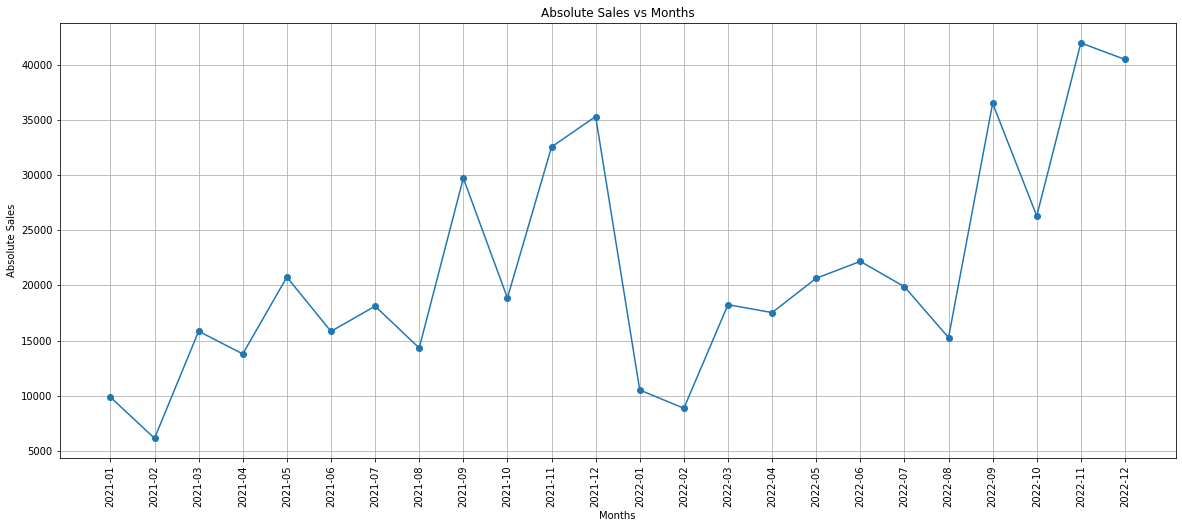

In [52]:

plt.figure(figsize=(20, 8))
plt.grid()
plt.plot(vis_orders['Order Date'], vis_orders['Dollar Sales'], marker='o') 
plt.xlabel('Months')
plt.ylabel('Absolute Sales') 
plt.xticks(rotation = 90)
plt.title('Absolute Sales vs Months') 

Text(0.5, 1.0, 'Sales Growth vs Months')

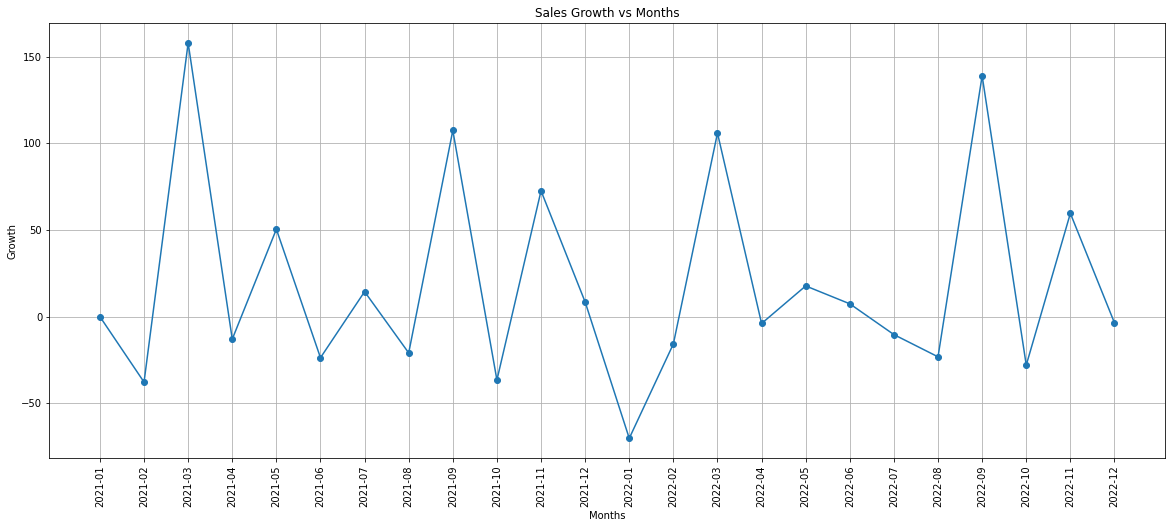

In [53]:
plt.figure(figsize=(20, 8))
plt.grid()
plt.plot(vis_orders['Order Date'], vis_orders['Growth (%)'], marker='o') 
plt.xlabel('Months')
plt.ylabel('Growth') 
plt.xticks(rotation = 90)
plt.title('Sales Growth vs Months') 

## Q.2

In [54]:
vis_top_products = orders.drop(['Transaction ID','Quantity','Returns'],axis =1).groupby(['Category','Product Name'])

In [55]:
vis_top_products = vis_top_products.agg('sum')

In [56]:
vis_top_products = vis_top_products.reset_index()

## Ans 2

Text(0.5, 1.0, 'Sales Distribution of Jeans')

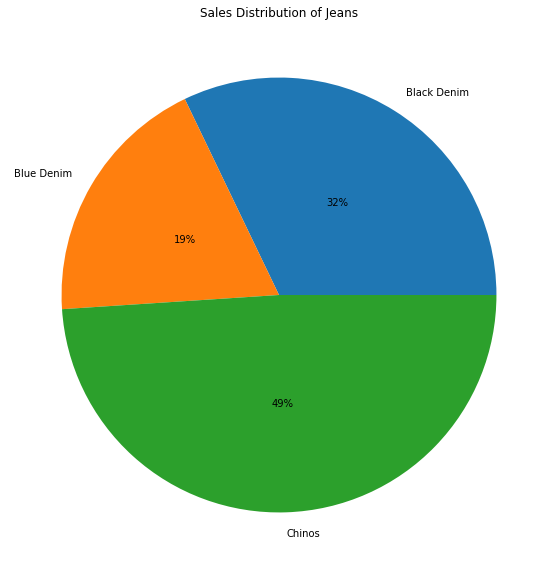

In [57]:
vis_jeans = vis_top_products[vis_top_products['Category']=='Jeans']
plt.figure(figsize=(10, 10))
plt.pie(vis_jeans['Dollar Sales'],labels = vis_jeans['Product Name'],autopct='%1.0f%%', pctdistance=0.5)
plt.title('Sales Distribution of Jeans') 

Text(0.5, 1.0, 'Sales Distribution of Shoes')

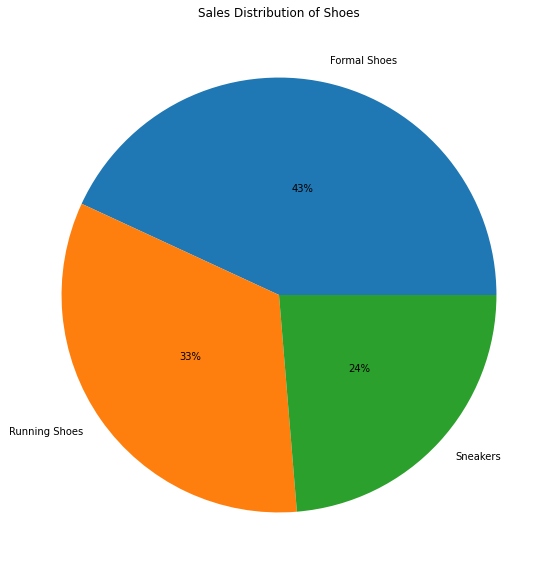

In [58]:
vis_shoes = vis_top_products[vis_top_products['Category']=='Shoes']
plt.figure(figsize=(10, 10))
plt.pie(vis_shoes['Dollar Sales'],labels = vis_shoes['Product Name'],autopct='%1.0f%%', pctdistance=0.5)
plt.title('Sales Distribution of Shoes') 

Text(0.5, 1.0, 'Sales Distribution of Shirts')

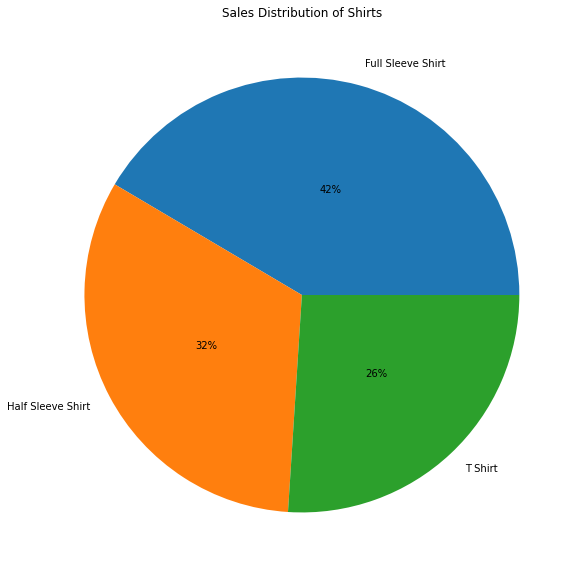

In [59]:
vis_shirts = vis_top_products[vis_top_products['Category']=='Shirts']
plt.figure(figsize=(10, 10))
plt.pie(vis_shirts['Dollar Sales'],labels = vis_shirts['Product Name'],autopct='%1.0f%%', pctdistance=0.5)
plt.title('Sales Distribution of Shirts') 

In [60]:
orders.columns

Index(['Transaction ID', 'Customer ID', 'Customer Name', 'Order Date',
       'Sales Person Name', 'Product ID', 'Category', 'Product Name',
       'Dollar Sales', 'Returns', 'Quantity'],
      dtype='object')

In [61]:
orders.to_csv('order.csv')

In [62]:
orders.columns

Index(['Transaction ID', 'Customer ID', 'Customer Name', 'Order Date',
       'Sales Person Name', 'Product ID', 'Category', 'Product Name',
       'Dollar Sales', 'Returns', 'Quantity'],
      dtype='object')

In [63]:
orders

,Transaction ID,Customer ID,Customer Name,Order Date,Sales Person Name,Product ID,Category,Product Name,Dollar Sales,Returns,Quantity
0,103982,AA-10375,Allen Armold,2021-11,John Blake,J-2001,Jeans,Black Denim,25,0,1
1,147039,AA-10375,Allen Armold,2022-09,Alex Ferguson,J-2003,Jeans,Chinos,200,0,5
2,131065,AA-10375,Allen Armold,2022-09,Alex Ferguson,J-2002,Jeans,Blue Denim,30,0,2
3,131065,AA-10375,Allen Armold,2022-12,Alex Ferguson,J-2003,Jeans,Chinos,120,0,3
4,169488,AA-10480,Andrew Allen,2021-07,Samuel Washington,J-2003,Jeans,Chinos,120,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3427,167682,ZC-21910,Zuschuss Carroll,2021-03,John Blake,SO-3003,Shoes,Formal Shoes,270,12,3
3428,147991,ZC-21910,Zuschuss Carroll,2021-04,Jane Austin,SO-3003,Shoes,Formal Shoes,360,19,4
3429,152471,ZC-21910,Zuschuss Carroll,2022-11,Mike Davidson,SO-3001,Shoes,Sneakers,50,0,1
3430,152471,ZD-21925,Zuschuss Donatelli,2021-04,Jane Austin,SO-3002,Shoes,Running Shoes,280,2,4


In [64]:
orders.iloc[1:3,]

,Transaction ID,Customer ID,Customer Name,Order Date,Sales Person Name,Product ID,Category,Product Name,Dollar Sales,Returns,Quantity
1,147039,AA-10375,Allen Armold,2022-09,Alex Ferguson,J-2003,Jeans,Chinos,200,0,5
2,131065,AA-10375,Allen Armold,2022-09,Alex Ferguson,J-2002,Jeans,Blue Denim,30,0,2


In [65]:
orders.sort_values('Order Date')

,Transaction ID,Customer ID,Customer Name,Order Date,Sales Person Name,Product ID,Category,Product Name,Dollar Sales,Returns,Quantity
2436,100839,CM-11935,Carlos Meador,2021-01,John Blake,SO-3003,Shoes,Formal Shoes,720,27,8
3364,154816,TD-20995,Tamara Dahlen,2021-01,Mike Davidson,SO-3002,Shoes,Running Shoes,490,47,7
3363,155698,TD-20995,Tamara Dahlen,2021-01,Mike Davidson,SO-3003,Shoes,Formal Shoes,180,0,2
3056,140172,MP-17470,Mark Packer,2021-01,Alex Ferguson,SO-3003,Shoes,Formal Shoes,1260,48,14
40,153822,AG-10675,Anna Gayman,2021-01,John Blake,J-2001,Jeans,Black Denim,50,0,2
...,...,...,...,...,...,...,...,...,...,...,...
2357,150077,BS-11380,Bill Stewart,2022-12,Mike Davidson,SO-3002,Shoes,Running Shoes,560,17,8
2358,107104,BS-11380,Bill Stewart,2022-12,Mike Davidson,SO-3001,Shoes,Sneakers,300,37,6
2359,107104,BS-11380,Bill Stewart,2022-12,Mike Davidson,SO-3001,Shoes,Sneakers,250,2,5
607,112753,KH-16510,Keith Herrera,2022-12,Mike Davidson,J-2003,Jeans,Chinos,40,0,1


In [67]:
Select  `Customer ID`, `Dollar Sales` from Order Count (*) Order by `Dollar Sales` Desc;

2
3
4
5
6
7
8
9
10
